In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

In [138]:
from datetime import date
start = "2015-01-01"
end = date.today().strftime("%Y-%m-%d")
df = yf.download("TSLA", start=start, end=end)
print(df.tail(10))

C:\Users\FTT\AppData\Local\Temp\ipykernel_15012\3786553263.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-12-08  439.579987  449.750000  435.250000  447.450012   69165800
2025-12-09  445.170013  452.390015  435.700012  437.540009   62367400
2025-12-10  451.450012  456.880005  443.609985  446.070007   63257500
2025-12-11  446.890015  449.269989  440.329987  448.950012   55979500
2025-12-12  458.959991  463.010010  441.670013  448.089996   95656700
2025-12-15  475.309998  481.769989  467.660004  469.440002  114542200
2025-12-16  489.880005  491.500000  465.829987  472.209991  107608100
2025-12-17  467.260010  495.279999  466.200012  488.220001  106490400
2025-12-18  483.369995  490.859985  473.119995  478.160004   95168400
2025-12-19  481.200012  490.489990  474.720001  488.119995  103066200


In [139]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [140]:
df = df.drop(['Date'],axis=1)
df.head(10)

C:\Users\FTT\AppData\Local\Temp\ipykernel_15012\655916378.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,14.620667,14.883333,14.217333,14.858000,71466000
1,14.006000,14.433333,13.810667,14.303333,80527500
2,14.085333,14.280000,13.614000,14.004000,93928500
3,14.063333,14.318667,13.985333,14.223333,44526000
4,14.041333,14.253333,14.000667,14.187333,51637500
5,13.777333,13.998667,13.664000,13.928000,70024500
6,13.480667,13.631333,13.283333,13.536667,89254500
7,13.616667,13.840667,13.394000,13.554667,67159500
8,12.846000,13.013333,12.333333,12.388667,173278500


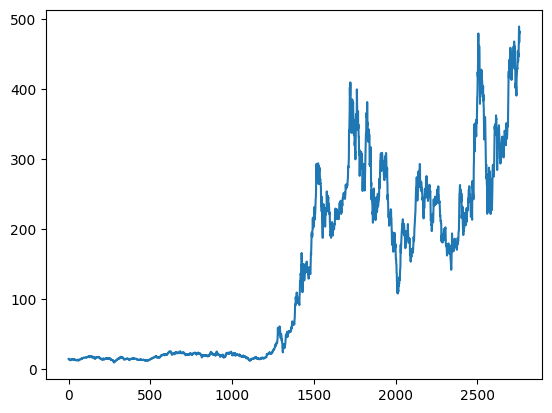

In [141]:
plt.plot(df.Close)

In [142]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2754,400.0782
2755,401.8164
2756,403.2331
2757,404.8548


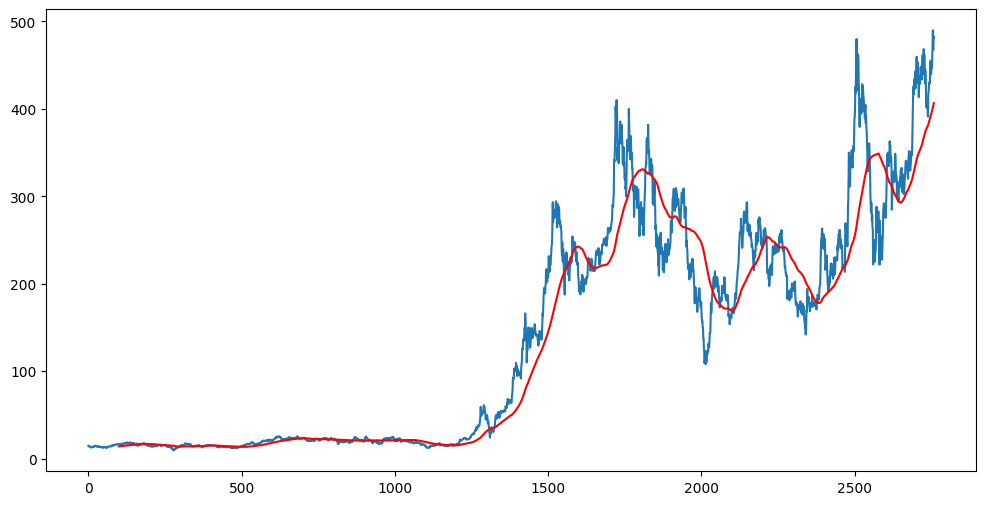

In [143]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [144]:
ma200 = df.Close.rolling(200).mean()

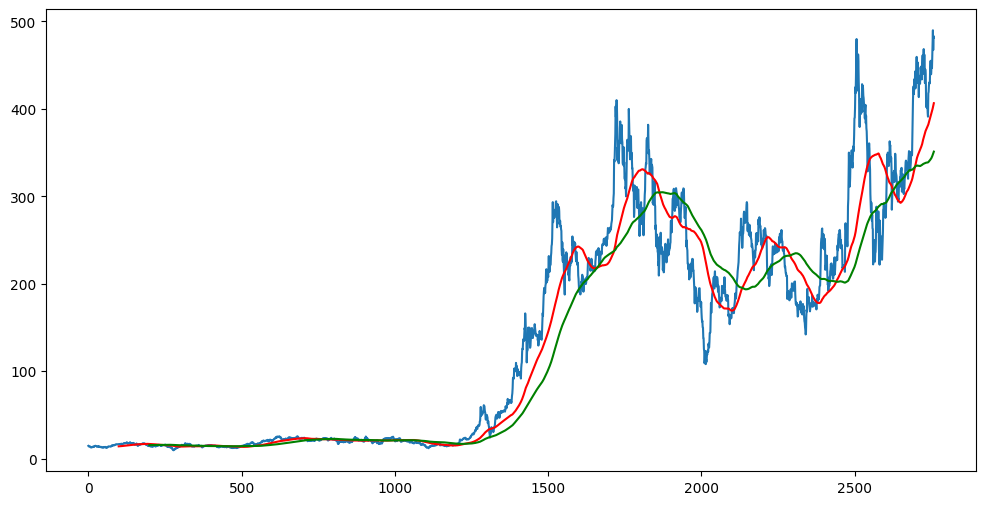

In [145]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [146]:
df.shape

(2759, 5)

In [147]:
df.dropna(inplace=True)

spliting of data

In [148]:
# from sklearn.model_selection import train_test_split

# y = df['Close']

# y_train, y_test = train_test_split(y,test_size=0.3,random_state=42)
# y_train.shape,y_test.shape

data_train = pd.DataFrame(df.Close[0:int(len(df)*0.80)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.80):len(df)])

In [149]:
data_train.shape[0]

2207

In [150]:
data_test.shape[0]

552

In [151]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

y_train_scaler = scaler.fit_transform(data_train)
y_train_scaler

array([[0.03566277],
       [0.03416347],
       [0.03435698],
       ...,
       [0.63431467],
       [0.63548552],
       [0.63338784]], shape=(2207, 1))

In [152]:
x_train = []
y_train1 = []

for i in range(100,y_train_scaler.shape[0]):
    x_train.append(y_train_scaler[i-100:i])
    y_train1.append(y_train_scaler[i,0])

x_train, y_train1 = np.array(x_train), np.array(y_train1)

In [153]:
x_train.shape

(2107, 100, 1)

In [154]:
y_train1.shape

(2107,)

ML Model

In [155]:
from keras.layers import Dense, Dropout, LSTM,Input
from keras.models import Sequential

In [156]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential()

# model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape = ((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


c:\Users\FTT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [157]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train1,epochs=50)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - loss: 0.0253
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0062
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0070
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0053
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0055
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0048
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0056
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0046
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0039
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0040
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0039
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0037
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms

In [159]:
model.save('keras_model.keras')

In [160]:
data_test.head()

Ticker,TSLA
2207,263.619995
2208,262.989990
2209,258.869995
2210,251.119995
2211,253.919998


In [161]:
past_100_day = data_train.tail(100)

In [162]:
final_df = pd.concat([past_100_day, data_test], ignore_index=True)

In [163]:
final_df.head()

Ticker,TSLA
0,173.860001
1,176.889999
2,180.139999
3,188.869995
4,185.770004


In [164]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.35490324],
       [0.36108842],
       [0.3677227 ],
       [0.38554338],
       [0.37921532],
       [0.37335672],
       [0.37656161],
       [0.39432105],
       [0.41063118],
       [0.4162856 ],
       [0.42361395],
       [0.43678043],
       [0.44421082],
       [0.45176369],
       [0.4584184 ],
       [0.47942353],
       [0.49889767],
       [0.50998204],
       [0.5281089 ],
       [0.52418961],
       [0.52237281],
       [0.53184455],
       [0.56023926],
       [0.52963989],
       [0.54015266],
       [0.52380175],
       [0.49205928],
       [0.51075775],
       [0.52306685],
       [0.52563893],
       [0.53435532],
       [0.57120112],
       [0.57663103],
       [0.56450561],
       [0.5601984 ],
       [0.55035924],
       [0.55072672],
       [0.55521758],
       [0.56728177],
       [0.57438557],
       [0.59275741],
       [0.59879969],
       [0.59455378],
       [0.53666202],
       [0.53078302],
       [0.54923654],
       [0.54152036],
       [0.539

In [165]:
input_data.shape

(652, 1)

In [166]:
x_test1 = []
y_test2 = []

for i in range(100,input_data.shape[0]):
    x_test1.append(input_data[i-100:i])
    y_test2.append(input_data[i,0])

In [167]:
x_test1 , y_test2 = np.array(x_test1), np.array(y_test2)

In [168]:
x_test1.shape,y_test2.shape

((552, 100, 1), (552,))

In [169]:
y_predicted = model.predict(x_test1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step


In [170]:
y_predicted.shape

(552, 1)

In [171]:
y_test2.shape

(552,)

In [ ]:
scale_val = scaler.scale_

array([489.88000488])

In [ ]:
scale_factor = 1/scale_val
y_predicted = y_predicted * scale_factor
y_test2 = y_test2 * scale_factor

In [174]:
y_predicted

array([[14.635735 ],
       [14.8281355],
       [14.964902 ],
       [15.02803  ],
       [14.992121 ],
       [14.878384 ],
       [14.726411 ],
       [14.533177 ],
       [14.257108 ],
       [13.895287 ],
       [13.4746895],
       [13.0419445],
       [12.637642 ],
       [12.283438 ],
       [11.999697 ],
       [11.777342 ],
       [11.612782 ],
       [11.518147 ],
       [11.536423 ],
       [11.681521 ],
       [11.922611 ],
       [12.214737 ],
       [12.506691 ],
       [12.71694  ],
       [12.82434  ],
       [12.866381 ],
       [12.924998 ],
       [13.063122 ],
       [13.248183 ],
       [13.429687 ],
       [13.57401  ],
       [13.6843405],
       [13.742478 ],
       [13.747785 ],
       [13.713342 ],
       [13.692802 ],
       [13.707623 ],
       [13.739467 ],
       [13.763354 ],
       [13.755245 ],
       [13.721421 ],
       [13.678112 ],
       [13.651521 ],
       [13.6583395],
       [13.682678 ],
       [13.697607 ],
       [13.698306 ],
       [13.73

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test2, y_predicted)
mse = mean_squared_error(y_test2, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_predicted)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.1267206016451938
MSE: 2.190508002621995
RMSE: 1.4800364869225335
R2 Score: 0.9140812736854275


Text(0, 0.5, 'Price')

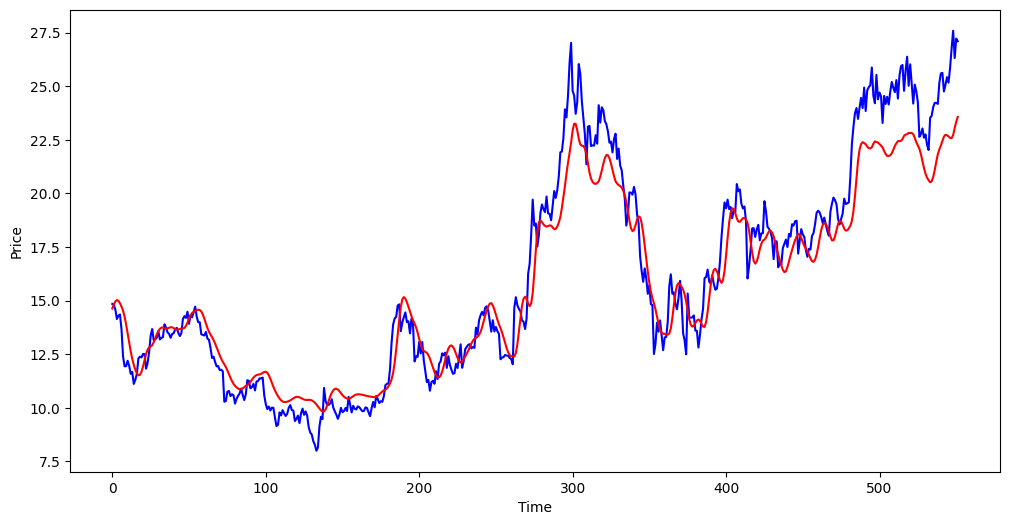

In [176]:
plt.figure(figsize=(12,6))
plt.plot(y_test2, color='b',label="Original_price")
plt.plot(y_predicted,color='r',label='Predicted_price')
plt.xlabel('Time')
plt.ylabel('Price')